In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import tensorflow
from tensorflow import keras
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, GlobalMaxPooling1D
from keras.layers import BatchNormalization, ReLU
import tensorflow.keras.optimizers

In [2]:

data_test = pd.read_csv("C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\FordA_TEST.csv")
data_train = pd.read_csv("C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\FordA_TRAIN.csv")

x_train_temp = data_train.iloc[:,:-1]
y_train_temp = data_train.iloc[:,-1]
y_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]

x_train_temp.head()

n_x = x_train_temp[y_train_temp == 1]
an_x = x_train_temp[y_train_temp == 0]
n_y = y_train_temp[y_train_temp == 1]
an_y = y_train_temp[y_train_temp == 0]

ind_nx = int(n_x.shape[0]*0.8)
ind_ny = int(n_y.shape[0] * 0.8)
ind_anx = int(an_x.shape[0] * 0.8)
ind_any = int(an_y.shape[0] * 0.8)

x_train = np.concatenate((n_x[:ind_nx], an_x[:ind_anx]), axis = 0)
x_valid = np.concatenate((n_x[:ind_nx], an_x[:ind_anx]), axis = 0)
y_train = np.concatenate((n_y[:ind_ny], an_y[:ind_any]), axis = 0)
y_valid = np.concatenate((n_y[:ind_ny], an_y[:ind_any]), axis = 0)

x_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]


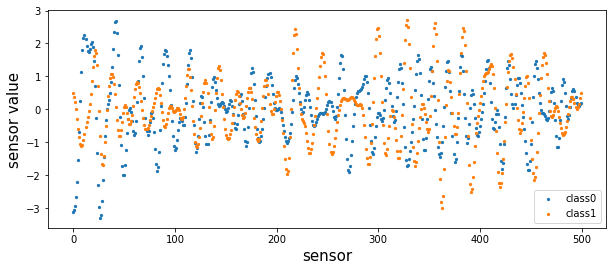

In [3]:
import random

labels = np.unique(np.concatenate((y_train, y_test), axis = 0))

plt.figure(figsize = (10, 4))

for c in labels:
  x_train_n = x_train[y_train == c]
  if c == -1 : c = c+1
  t = random.randint(0, x_train_n.shape[0])
  plt.scatter(range(0, 500), x_train_n[t], label ='class' + str(int(c)), marker = 'o', s=5)

plt.legend(loc='lower right')
plt.xlabel("sensor", fontsize = 15)
plt.ylabel("sensor value", fontsize = 15)
plt.show()

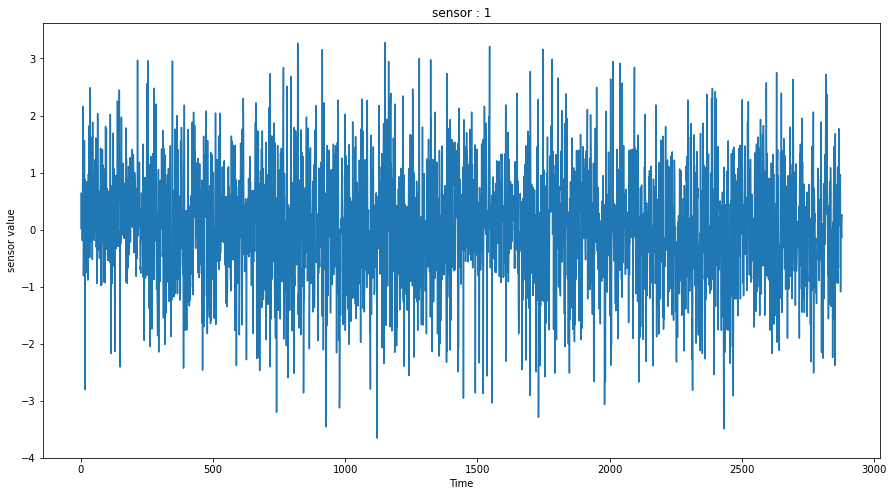

In [4]:
num = random.randint(0,500)
plt.figure(figsize = (15, 8))
plt.plot(x_train[:, num])
plt.title("sensor : {}".format(num))
plt.xlabel("Time")
plt.ylabel("sensor value")
plt.show()

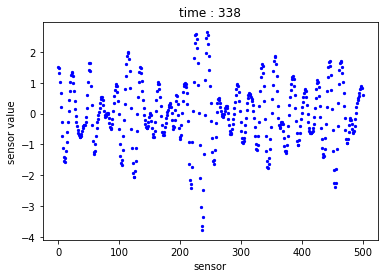

In [5]:
time_t = random.randint(0, x_train_n.shape[0])
plt.scatter(range(0, x_train_n.shape[1]), x_train_n[338],
            marker = 'o',s=5, c='b')

plt.title("time : {}".format(338))
plt.xlabel("sensor")
plt.ylabel("sensor value")
plt.show()

[(0.0, 1500.0)]

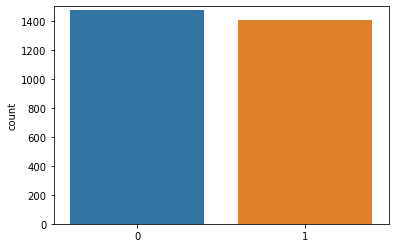

In [6]:
sns.countplot(x=y_train).set(ylim=(0,1500))

[(0.0, 1500.0)]

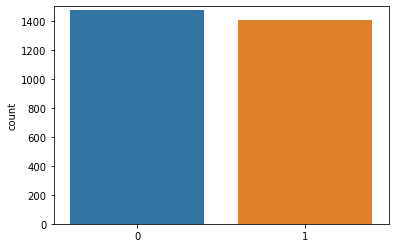

In [7]:
sns.countplot(x=y_valid).set(ylim=(0,1500))

[(0.0, 1500.0)]

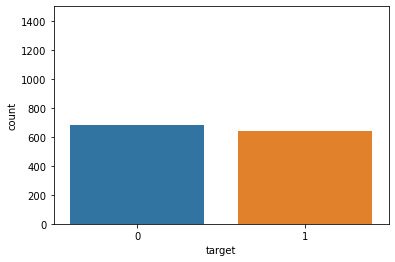

In [8]:
sns.countplot(x=y_test).set(ylim=(0,1500))

In [9]:
"""
corr_df = X.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

pd.options.display.max_rows = 60
pd.options.display.max_columns = 20
"""


'\ncorr_df = X.corr()\ncorr_df = corr_df.apply(lambda x: round(x ,2))\ncorr_df\n\npd.options.display.max_rows = 60\npd.options.display.max_columns = 20\n'

In [10]:
"""
y_train[y_train == 0] = 0
y_valid[y_valid == 0] = 0
y_test[y_test == 0] = 0

y_train[y_train == 1] = 1
y_valid[y_valid == 1] = 1
y_test[y_test == 1] = 1
"""

'\ny_train[y_train == 0] = 0\ny_valid[y_valid == 0] = 0\ny_test[y_test == 0] = 0\n\ny_train[y_train == 1] = 1\ny_valid[y_valid == 1] = 1\ny_test[y_test == 1] = 1\n'

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)

x_train = std.transform(x_train)
x_valid = std.transform(x_valid)

x_train.shape
x_train

std = StandardScaler()
std.fit(x_test)

x_test = std.transform(x_test)

In [12]:
x_train_c = np.expand_dims(x_train, -1)
x_valid_c = np.expand_dims(x_valid, -1)
x_test_c = np.expand_dims(x_test, -1)


In [13]:
y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)
y_test = y_test.astype(np.float32)

In [14]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV, train_test_split

 
model = Sequential()

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience = 50, verbose = 1)
model_checkpoint = ModelCheckpoint(filepath='./{epoch}-{val_loss:.2f}-{val_sparse_categorical_accuracy:.2f}', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lronplateau = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 20, min_lr = 0.00001)



In [15]:
history = model.fit(x_train_c, y_train,
                    batch_size = 64,
                    epochs = 100,
                    callbacks=[early_stopping, model_checkpoint],
                    validation_data = (x_valid_c, y_valid), verbose = 1)


Epoch 1/100
45/45 [==============================] - ETA: 0s - loss: 0.7690 - sparse_categorical_accuracy: 0.6163
Epoch 1: val_loss improved from inf to 0.70604, saving model to .\1-0.71-0.51


INFO:tensorflow:Assets written to: .\1-0.71-0.51\assets


INFO:tensorflow:Assets written to: .\1-0.71-0.51\assets


45/45 [==============================] - 16s 319ms/step - loss: 0.7690 - sparse_categorical_accuracy: 0.6163 - val_loss: 0.7060 - val_sparse_categorical_accuracy: 0.5125
Epoch 2/100
45/45 [==============================] - ETA: 0s - loss: 0.5281 - sparse_categorical_accuracy: 0.7274
Epoch 2: val_loss did not improve from 0.70604
45/45 [==============================] - 9s 201ms/step - loss: 0.5281 - sparse_categorical_accuracy: 0.7274 - val_loss: 0.7882 - val_sparse_categorical_accuracy: 0.5125
Epoch 3/100
45/45 [==============================] - ETA: 0s - loss: 0.5016 - sparse_categorical_accuracy: 0.7420
Epoch 3: val_loss did not improve from 0.70604
45/45 [==============================] - 9s 201ms/step - loss: 0.5016 - sparse_categorical_accuracy: 0.7420 - val_loss: 0.8730 - val_sparse_categorical_accuracy: 0.5125
Epoch 4/100
45/45 [==============================] - ETA: 0s - loss: 0.4743 - sparse_categorical_accuracy: 0.7580
Epoch 4: val_loss did not improve from 0.70604
45/45 [==

INFO:tensorflow:Assets written to: .\11-0.45-0.81\assets


INFO:tensorflow:Assets written to: .\11-0.45-0.81\assets


45/45 [==============================] - 9s 212ms/step - loss: 0.4081 - sparse_categorical_accuracy: 0.8007 - val_loss: 0.4456 - val_sparse_categorical_accuracy: 0.8062
Epoch 12/100
45/45 [==============================] - ETA: 0s - loss: 0.3884 - sparse_categorical_accuracy: 0.8087
Epoch 12: val_loss did not improve from 0.44563
45/45 [==============================] - 10s 216ms/step - loss: 0.3884 - sparse_categorical_accuracy: 0.8087 - val_loss: 0.5121 - val_sparse_categorical_accuracy: 0.7510
Epoch 13/100
45/45 [==============================] - ETA: 0s - loss: 0.3777 - sparse_categorical_accuracy: 0.8229
Epoch 13: val_loss improved from 0.44563 to 0.39645, saving model to .\13-0.40-0.81


INFO:tensorflow:Assets written to: .\13-0.40-0.81\assets


INFO:tensorflow:Assets written to: .\13-0.40-0.81\assets


45/45 [==============================] - 18s 399ms/step - loss: 0.3777 - sparse_categorical_accuracy: 0.8229 - val_loss: 0.3965 - val_sparse_categorical_accuracy: 0.8056
Epoch 14/100
45/45 [==============================] - ETA: 0s - loss: 0.3984 - sparse_categorical_accuracy: 0.8083
Epoch 14: val_loss improved from 0.39645 to 0.38364, saving model to .\14-0.38-0.82


INFO:tensorflow:Assets written to: .\14-0.38-0.82\assets


INFO:tensorflow:Assets written to: .\14-0.38-0.82\assets


45/45 [==============================] - 19s 433ms/step - loss: 0.3984 - sparse_categorical_accuracy: 0.8083 - val_loss: 0.3836 - val_sparse_categorical_accuracy: 0.8205
Epoch 15/100
45/45 [==============================] - ETA: 0s - loss: 0.4018 - sparse_categorical_accuracy: 0.8125
Epoch 15: val_loss improved from 0.38364 to 0.37483, saving model to .\15-0.37-0.84


INFO:tensorflow:Assets written to: .\15-0.37-0.84\assets


INFO:tensorflow:Assets written to: .\15-0.37-0.84\assets


45/45 [==============================] - 18s 400ms/step - loss: 0.4018 - sparse_categorical_accuracy: 0.8125 - val_loss: 0.3748 - val_sparse_categorical_accuracy: 0.8354
Epoch 16/100
45/45 [==============================] - ETA: 0s - loss: 0.3814 - sparse_categorical_accuracy: 0.8205
Epoch 16: val_loss did not improve from 0.37483
45/45 [==============================] - 13s 289ms/step - loss: 0.3814 - sparse_categorical_accuracy: 0.8205 - val_loss: 0.3826 - val_sparse_categorical_accuracy: 0.8236
Epoch 17/100
45/45 [==============================] - ETA: 0s - loss: 0.3879 - sparse_categorical_accuracy: 0.8122
Epoch 17: val_loss did not improve from 0.37483
45/45 [==============================] - 13s 279ms/step - loss: 0.3879 - sparse_categorical_accuracy: 0.8122 - val_loss: 0.5133 - val_sparse_categorical_accuracy: 0.7465
Epoch 18/100
45/45 [==============================] - ETA: 0s - loss: 0.3905 - sparse_categorical_accuracy: 0.8188
Epoch 18: val_loss did not improve from 0.37483
4

INFO:tensorflow:Assets written to: .\19-0.36-0.82\assets


INFO:tensorflow:Assets written to: .\19-0.36-0.82\assets


45/45 [==============================] - 17s 377ms/step - loss: 0.3679 - sparse_categorical_accuracy: 0.8299 - val_loss: 0.3615 - val_sparse_categorical_accuracy: 0.8215
Epoch 20/100
45/45 [==============================] - ETA: 0s - loss: 0.3735 - sparse_categorical_accuracy: 0.8212
Epoch 20: val_loss improved from 0.36145 to 0.35091, saving model to .\20-0.35-0.84


INFO:tensorflow:Assets written to: .\20-0.35-0.84\assets


INFO:tensorflow:Assets written to: .\20-0.35-0.84\assets


45/45 [==============================] - 18s 394ms/step - loss: 0.3735 - sparse_categorical_accuracy: 0.8212 - val_loss: 0.3509 - val_sparse_categorical_accuracy: 0.8448
Epoch 21/100
45/45 [==============================] - ETA: 0s - loss: 0.3616 - sparse_categorical_accuracy: 0.8354
Epoch 21: val_loss did not improve from 0.35091
45/45 [==============================] - 16s 358ms/step - loss: 0.3616 - sparse_categorical_accuracy: 0.8354 - val_loss: 0.3796 - val_sparse_categorical_accuracy: 0.7962
Epoch 22/100
45/45 [==============================] - ETA: 0s - loss: 0.3777 - sparse_categorical_accuracy: 0.8226
Epoch 22: val_loss improved from 0.35091 to 0.33879, saving model to .\22-0.34-0.86


INFO:tensorflow:Assets written to: .\22-0.34-0.86\assets


INFO:tensorflow:Assets written to: .\22-0.34-0.86\assets


45/45 [==============================] - 18s 399ms/step - loss: 0.3777 - sparse_categorical_accuracy: 0.8226 - val_loss: 0.3388 - val_sparse_categorical_accuracy: 0.8556
Epoch 23/100
45/45 [==============================] - ETA: 0s - loss: 0.3587 - sparse_categorical_accuracy: 0.8313
Epoch 23: val_loss did not improve from 0.33879
45/45 [==============================] - 13s 288ms/step - loss: 0.3587 - sparse_categorical_accuracy: 0.8313 - val_loss: 0.4352 - val_sparse_categorical_accuracy: 0.8045
Epoch 24/100
45/45 [==============================] - ETA: 0s - loss: 0.3677 - sparse_categorical_accuracy: 0.8295
Epoch 24: val_loss did not improve from 0.33879
45/45 [==============================] - 14s 310ms/step - loss: 0.3677 - sparse_categorical_accuracy: 0.8295 - val_loss: 0.3550 - val_sparse_categorical_accuracy: 0.8281
Epoch 25/100
45/45 [==============================] - ETA: 0s - loss: 0.3519 - sparse_categorical_accuracy: 0.8368
Epoch 25: val_loss did not improve from 0.33879
4

INFO:tensorflow:Assets written to: .\26-0.33-0.85\assets


INFO:tensorflow:Assets written to: .\26-0.33-0.85\assets


45/45 [==============================] - 17s 387ms/step - loss: 0.3556 - sparse_categorical_accuracy: 0.8344 - val_loss: 0.3332 - val_sparse_categorical_accuracy: 0.8500
Epoch 27/100
45/45 [==============================] - ETA: 0s - loss: 0.3409 - sparse_categorical_accuracy: 0.8490
Epoch 27: val_loss did not improve from 0.33324
45/45 [==============================] - 14s 314ms/step - loss: 0.3409 - sparse_categorical_accuracy: 0.8490 - val_loss: 0.3604 - val_sparse_categorical_accuracy: 0.8434
Epoch 28/100
45/45 [==============================] - ETA: 0s - loss: 0.3593 - sparse_categorical_accuracy: 0.8372
Epoch 28: val_loss did not improve from 0.33324
45/45 [==============================] - 15s 331ms/step - loss: 0.3593 - sparse_categorical_accuracy: 0.8372 - val_loss: 0.5123 - val_sparse_categorical_accuracy: 0.7375
Epoch 29/100
45/45 [==============================] - ETA: 0s - loss: 0.3351 - sparse_categorical_accuracy: 0.8545
Epoch 29: val_loss did not improve from 0.33324
4

INFO:tensorflow:Assets written to: .\30-0.32-0.86\assets


INFO:tensorflow:Assets written to: .\30-0.32-0.86\assets


45/45 [==============================] - 17s 382ms/step - loss: 0.3387 - sparse_categorical_accuracy: 0.8441 - val_loss: 0.3246 - val_sparse_categorical_accuracy: 0.8583
Epoch 31/100
45/45 [==============================] - ETA: 0s - loss: 0.3319 - sparse_categorical_accuracy: 0.8535
Epoch 31: val_loss did not improve from 0.32462
45/45 [==============================] - 13s 287ms/step - loss: 0.3319 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.3732 - val_sparse_categorical_accuracy: 0.7983
Epoch 32/100
45/45 [==============================] - ETA: 0s - loss: 0.3337 - sparse_categorical_accuracy: 0.8500
Epoch 32: val_loss did not improve from 0.32462
45/45 [==============================] - 15s 323ms/step - loss: 0.3337 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.3471 - val_sparse_categorical_accuracy: 0.8236
Epoch 33/100
45/45 [==============================] - ETA: 0s - loss: 0.3309 - sparse_categorical_accuracy: 0.8497
Epoch 33: val_loss did not improve from 0.32462
4

INFO:tensorflow:Assets written to: .\36-0.31-0.87\assets


INFO:tensorflow:Assets written to: .\36-0.31-0.87\assets


45/45 [==============================] - 14s 308ms/step - loss: 0.3191 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.3135 - val_sparse_categorical_accuracy: 0.8684
Epoch 37/100
45/45 [==============================] - ETA: 0s - loss: 0.3782 - sparse_categorical_accuracy: 0.8184
Epoch 37: val_loss did not improve from 0.31349
45/45 [==============================] - 14s 302ms/step - loss: 0.3782 - sparse_categorical_accuracy: 0.8184 - val_loss: 0.4019 - val_sparse_categorical_accuracy: 0.8198
Epoch 38/100
45/45 [==============================] - ETA: 0s - loss: 0.3554 - sparse_categorical_accuracy: 0.8382
Epoch 38: val_loss did not improve from 0.31349
45/45 [==============================] - 15s 330ms/step - loss: 0.3554 - sparse_categorical_accuracy: 0.8382 - val_loss: 0.3212 - val_sparse_categorical_accuracy: 0.8566
Epoch 39/100
45/45 [==============================] - ETA: 0s - loss: 0.3319 - sparse_categorical_accuracy: 0.8472
Epoch 39: val_loss improved from 0.31349 to 0.310

INFO:tensorflow:Assets written to: .\39-0.31-0.87\assets


INFO:tensorflow:Assets written to: .\39-0.31-0.87\assets


45/45 [==============================] - 18s 408ms/step - loss: 0.3319 - sparse_categorical_accuracy: 0.8472 - val_loss: 0.3108 - val_sparse_categorical_accuracy: 0.8681
Epoch 40/100
45/45 [==============================] - ETA: 0s - loss: 0.3432 - sparse_categorical_accuracy: 0.8340
Epoch 40: val_loss did not improve from 0.31079
45/45 [==============================] - 16s 355ms/step - loss: 0.3432 - sparse_categorical_accuracy: 0.8340 - val_loss: 0.3556 - val_sparse_categorical_accuracy: 0.8149
Epoch 41/100
45/45 [==============================] - ETA: 0s - loss: 0.3297 - sparse_categorical_accuracy: 0.8521
Epoch 41: val_loss did not improve from 0.31079
45/45 [==============================] - 16s 366ms/step - loss: 0.3297 - sparse_categorical_accuracy: 0.8521 - val_loss: 0.3383 - val_sparse_categorical_accuracy: 0.8514
Epoch 42/100
45/45 [==============================] - ETA: 0s - loss: 0.3172 - sparse_categorical_accuracy: 0.8604
Epoch 42: val_loss improved from 0.31079 to 0.298

INFO:tensorflow:Assets written to: .\42-0.30-0.87\assets


INFO:tensorflow:Assets written to: .\42-0.30-0.87\assets


45/45 [==============================] - 15s 329ms/step - loss: 0.3172 - sparse_categorical_accuracy: 0.8604 - val_loss: 0.2984 - val_sparse_categorical_accuracy: 0.8701
Epoch 43/100
45/45 [==============================] - ETA: 0s - loss: 0.3279 - sparse_categorical_accuracy: 0.8517
Epoch 43: val_loss did not improve from 0.29835
45/45 [==============================] - 12s 272ms/step - loss: 0.3279 - sparse_categorical_accuracy: 0.8517 - val_loss: 0.3231 - val_sparse_categorical_accuracy: 0.8615
Epoch 44/100
45/45 [==============================] - ETA: 0s - loss: 0.3089 - sparse_categorical_accuracy: 0.8649
Epoch 44: val_loss improved from 0.29835 to 0.29315, saving model to .\44-0.29-0.87


INFO:tensorflow:Assets written to: .\44-0.29-0.87\assets


INFO:tensorflow:Assets written to: .\44-0.29-0.87\assets


45/45 [==============================] - 18s 395ms/step - loss: 0.3089 - sparse_categorical_accuracy: 0.8649 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.8747
Epoch 45/100
45/45 [==============================] - ETA: 0s - loss: 0.3058 - sparse_categorical_accuracy: 0.8681
Epoch 45: val_loss did not improve from 0.29315
45/45 [==============================] - 15s 328ms/step - loss: 0.3058 - sparse_categorical_accuracy: 0.8681 - val_loss: 0.3210 - val_sparse_categorical_accuracy: 0.8608
Epoch 46/100
45/45 [==============================] - ETA: 0s - loss: 0.3101 - sparse_categorical_accuracy: 0.8667
Epoch 46: val_loss did not improve from 0.29315
45/45 [==============================] - 16s 349ms/step - loss: 0.3101 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.3582 - val_sparse_categorical_accuracy: 0.8104
Epoch 47/100
45/45 [==============================] - ETA: 0s - loss: 0.3188 - sparse_categorical_accuracy: 0.8524
Epoch 47: val_loss improved from 0.29315 to 0.287

INFO:tensorflow:Assets written to: .\47-0.29-0.88\assets


INFO:tensorflow:Assets written to: .\47-0.29-0.88\assets


45/45 [==============================] - 15s 337ms/step - loss: 0.3188 - sparse_categorical_accuracy: 0.8524 - val_loss: 0.2872 - val_sparse_categorical_accuracy: 0.8819
Epoch 48/100
45/45 [==============================] - ETA: 0s - loss: 0.3192 - sparse_categorical_accuracy: 0.8538
Epoch 48: val_loss did not improve from 0.28718
45/45 [==============================] - 15s 325ms/step - loss: 0.3192 - sparse_categorical_accuracy: 0.8538 - val_loss: 0.2984 - val_sparse_categorical_accuracy: 0.8628
Epoch 49/100
45/45 [==============================] - ETA: 0s - loss: 0.3073 - sparse_categorical_accuracy: 0.8608
Epoch 49: val_loss did not improve from 0.28718
45/45 [==============================] - 12s 261ms/step - loss: 0.3073 - sparse_categorical_accuracy: 0.8608 - val_loss: 0.3817 - val_sparse_categorical_accuracy: 0.7976
Epoch 50/100
45/45 [==============================] - ETA: 0s - loss: 0.2977 - sparse_categorical_accuracy: 0.8719
Epoch 50: val_loss improved from 0.28718 to 0.282

INFO:tensorflow:Assets written to: .\50-0.28-0.88\assets


INFO:tensorflow:Assets written to: .\50-0.28-0.88\assets


45/45 [==============================] - 19s 419ms/step - loss: 0.2977 - sparse_categorical_accuracy: 0.8719 - val_loss: 0.2829 - val_sparse_categorical_accuracy: 0.8802
Epoch 51/100
45/45 [==============================] - ETA: 0s - loss: 0.3025 - sparse_categorical_accuracy: 0.8674
Epoch 51: val_loss did not improve from 0.28292
45/45 [==============================] - 14s 304ms/step - loss: 0.3025 - sparse_categorical_accuracy: 0.8674 - val_loss: 0.3419 - val_sparse_categorical_accuracy: 0.8181
Epoch 52/100
45/45 [==============================] - ETA: 0s - loss: 0.3055 - sparse_categorical_accuracy: 0.8674
Epoch 52: val_loss did not improve from 0.28292
45/45 [==============================] - 14s 326ms/step - loss: 0.3055 - sparse_categorical_accuracy: 0.8674 - val_loss: 0.2920 - val_sparse_categorical_accuracy: 0.8788
Epoch 53/100
45/45 [==============================] - ETA: 0s - loss: 0.2946 - sparse_categorical_accuracy: 0.8757
Epoch 53: val_loss improved from 0.28292 to 0.280

INFO:tensorflow:Assets written to: .\53-0.28-0.89\assets


INFO:tensorflow:Assets written to: .\53-0.28-0.89\assets


45/45 [==============================] - 17s 387ms/step - loss: 0.2946 - sparse_categorical_accuracy: 0.8757 - val_loss: 0.2808 - val_sparse_categorical_accuracy: 0.8872
Epoch 54/100
45/45 [==============================] - ETA: 0s - loss: 0.2870 - sparse_categorical_accuracy: 0.8733
Epoch 54: val_loss improved from 0.28075 to 0.27927, saving model to .\54-0.28-0.88


INFO:tensorflow:Assets written to: .\54-0.28-0.88\assets


INFO:tensorflow:Assets written to: .\54-0.28-0.88\assets


45/45 [==============================] - 16s 353ms/step - loss: 0.2870 - sparse_categorical_accuracy: 0.8733 - val_loss: 0.2793 - val_sparse_categorical_accuracy: 0.8813
Epoch 55/100
45/45 [==============================] - ETA: 0s - loss: 0.3030 - sparse_categorical_accuracy: 0.8628
Epoch 55: val_loss did not improve from 0.27927
45/45 [==============================] - 13s 287ms/step - loss: 0.3030 - sparse_categorical_accuracy: 0.8628 - val_loss: 0.3171 - val_sparse_categorical_accuracy: 0.8583
Epoch 56/100
45/45 [==============================] - ETA: 0s - loss: 0.2990 - sparse_categorical_accuracy: 0.8681
Epoch 56: val_loss did not improve from 0.27927
45/45 [==============================] - 13s 288ms/step - loss: 0.2990 - sparse_categorical_accuracy: 0.8681 - val_loss: 0.3228 - val_sparse_categorical_accuracy: 0.8344
Epoch 57/100
45/45 [==============================] - ETA: 0s - loss: 0.2858 - sparse_categorical_accuracy: 0.8733
Epoch 57: val_loss did not improve from 0.27927
4

INFO:tensorflow:Assets written to: .\60-0.27-0.90\assets


INFO:tensorflow:Assets written to: .\60-0.27-0.90\assets


45/45 [==============================] - 18s 402ms/step - loss: 0.2835 - sparse_categorical_accuracy: 0.8774 - val_loss: 0.2656 - val_sparse_categorical_accuracy: 0.8969
Epoch 61/100
45/45 [==============================] - ETA: 0s - loss: 0.2727 - sparse_categorical_accuracy: 0.8795
Epoch 61: val_loss did not improve from 0.26558
45/45 [==============================] - 14s 302ms/step - loss: 0.2727 - sparse_categorical_accuracy: 0.8795 - val_loss: 0.3304 - val_sparse_categorical_accuracy: 0.8559
Epoch 62/100
45/45 [==============================] - ETA: 0s - loss: 0.2786 - sparse_categorical_accuracy: 0.8802
Epoch 62: val_loss did not improve from 0.26558
45/45 [==============================] - 14s 307ms/step - loss: 0.2786 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.2732 - val_sparse_categorical_accuracy: 0.8774
Epoch 63/100
45/45 [==============================] - ETA: 0s - loss: 0.3004 - sparse_categorical_accuracy: 0.8656
Epoch 63: val_loss did not improve from 0.26558
4

INFO:tensorflow:Assets written to: .\65-0.26-0.90\assets


INFO:tensorflow:Assets written to: .\65-0.26-0.90\assets


45/45 [==============================] - 13s 291ms/step - loss: 0.2769 - sparse_categorical_accuracy: 0.8816 - val_loss: 0.2556 - val_sparse_categorical_accuracy: 0.8965
Epoch 66/100
45/45 [==============================] - ETA: 0s - loss: 0.2761 - sparse_categorical_accuracy: 0.8816
Epoch 66: val_loss did not improve from 0.25564
45/45 [==============================] - 14s 313ms/step - loss: 0.2761 - sparse_categorical_accuracy: 0.8816 - val_loss: 0.2582 - val_sparse_categorical_accuracy: 0.8969
Epoch 67/100
45/45 [==============================] - ETA: 0s - loss: 0.2837 - sparse_categorical_accuracy: 0.8837
Epoch 67: val_loss did not improve from 0.25564
45/45 [==============================] - 14s 317ms/step - loss: 0.2837 - sparse_categorical_accuracy: 0.8837 - val_loss: 0.2581 - val_sparse_categorical_accuracy: 0.8972
Epoch 68/100
45/45 [==============================] - ETA: 0s - loss: 0.2787 - sparse_categorical_accuracy: 0.8771
Epoch 68: val_loss did not improve from 0.25564
4

INFO:tensorflow:Assets written to: .\72-0.25-0.90\assets


INFO:tensorflow:Assets written to: .\72-0.25-0.90\assets


45/45 [==============================] - 16s 352ms/step - loss: 0.2583 - sparse_categorical_accuracy: 0.8875 - val_loss: 0.2477 - val_sparse_categorical_accuracy: 0.8969
Epoch 73/100
45/45 [==============================] - ETA: 0s - loss: 0.2684 - sparse_categorical_accuracy: 0.8858
Epoch 73: val_loss did not improve from 0.24773
45/45 [==============================] - 12s 279ms/step - loss: 0.2684 - sparse_categorical_accuracy: 0.8858 - val_loss: 0.2572 - val_sparse_categorical_accuracy: 0.8983
Epoch 74/100
45/45 [==============================] - ETA: 0s - loss: 0.2615 - sparse_categorical_accuracy: 0.8913
Epoch 74: val_loss did not improve from 0.24773
45/45 [==============================] - 14s 325ms/step - loss: 0.2615 - sparse_categorical_accuracy: 0.8913 - val_loss: 0.2952 - val_sparse_categorical_accuracy: 0.8684
Epoch 75/100
45/45 [==============================] - ETA: 0s - loss: 0.2702 - sparse_categorical_accuracy: 0.8854
Epoch 75: val_loss improved from 0.24773 to 0.247

INFO:tensorflow:Assets written to: .\75-0.25-0.90\assets


INFO:tensorflow:Assets written to: .\75-0.25-0.90\assets


45/45 [==============================] - 16s 358ms/step - loss: 0.2702 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.2474 - val_sparse_categorical_accuracy: 0.8958
Epoch 76/100
45/45 [==============================] - ETA: 0s - loss: 0.2682 - sparse_categorical_accuracy: 0.8878
Epoch 76: val_loss improved from 0.24739 to 0.23375, saving model to .\76-0.23-0.91


INFO:tensorflow:Assets written to: .\76-0.23-0.91\assets


INFO:tensorflow:Assets written to: .\76-0.23-0.91\assets


45/45 [==============================] - 17s 386ms/step - loss: 0.2682 - sparse_categorical_accuracy: 0.8878 - val_loss: 0.2337 - val_sparse_categorical_accuracy: 0.9101
Epoch 77/100
45/45 [==============================] - ETA: 0s - loss: 0.2534 - sparse_categorical_accuracy: 0.8969
Epoch 77: val_loss did not improve from 0.23375
45/45 [==============================] - 10s 218ms/step - loss: 0.2534 - sparse_categorical_accuracy: 0.8969 - val_loss: 0.2387 - val_sparse_categorical_accuracy: 0.9003
Epoch 78/100
45/45 [==============================] - ETA: 0s - loss: 0.2572 - sparse_categorical_accuracy: 0.8882
Epoch 78: val_loss did not improve from 0.23375
45/45 [==============================] - 15s 336ms/step - loss: 0.2572 - sparse_categorical_accuracy: 0.8882 - val_loss: 0.2407 - val_sparse_categorical_accuracy: 0.8979
Epoch 79/100
45/45 [==============================] - ETA: 0s - loss: 0.2557 - sparse_categorical_accuracy: 0.8924
Epoch 79: val_loss did not improve from 0.23375
4

INFO:tensorflow:Assets written to: .\83-0.22-0.92\assets


INFO:tensorflow:Assets written to: .\83-0.22-0.92\assets


45/45 [==============================] - 17s 372ms/step - loss: 0.2589 - sparse_categorical_accuracy: 0.8906 - val_loss: 0.2182 - val_sparse_categorical_accuracy: 0.9170
Epoch 84/100
45/45 [==============================] - ETA: 0s - loss: 0.2511 - sparse_categorical_accuracy: 0.8917
Epoch 84: val_loss did not improve from 0.21823
45/45 [==============================] - 13s 285ms/step - loss: 0.2511 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.2448 - val_sparse_categorical_accuracy: 0.9007
Epoch 85/100
45/45 [==============================] - ETA: 0s - loss: 0.2456 - sparse_categorical_accuracy: 0.9000
Epoch 85: val_loss did not improve from 0.21823
45/45 [==============================] - 13s 297ms/step - loss: 0.2456 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.2227 - val_sparse_categorical_accuracy: 0.9156
Epoch 86/100
45/45 [==============================] - ETA: 0s - loss: 0.2659 - sparse_categorical_accuracy: 0.8882
Epoch 86: val_loss did not improve from 0.21823
4

INFO:tensorflow:Assets written to: .\88-0.22-0.92\assets


INFO:tensorflow:Assets written to: .\88-0.22-0.92\assets


45/45 [==============================] - 16s 353ms/step - loss: 0.2287 - sparse_categorical_accuracy: 0.9135 - val_loss: 0.2165 - val_sparse_categorical_accuracy: 0.9243
Epoch 89/100
45/45 [==============================] - ETA: 0s - loss: 0.2373 - sparse_categorical_accuracy: 0.9007
Epoch 89: val_loss did not improve from 0.21647
45/45 [==============================] - 13s 293ms/step - loss: 0.2373 - sparse_categorical_accuracy: 0.9007 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.8628
Epoch 90/100
45/45 [==============================] - ETA: 0s - loss: 0.2342 - sparse_categorical_accuracy: 0.9017
Epoch 90: val_loss improved from 0.21647 to 0.21516, saving model to .\90-0.22-0.91


INFO:tensorflow:Assets written to: .\90-0.22-0.91\assets


INFO:tensorflow:Assets written to: .\90-0.22-0.91\assets


45/45 [==============================] - 16s 357ms/step - loss: 0.2342 - sparse_categorical_accuracy: 0.9017 - val_loss: 0.2152 - val_sparse_categorical_accuracy: 0.9146
Epoch 91/100
45/45 [==============================] - ETA: 0s - loss: 0.2273 - sparse_categorical_accuracy: 0.9111
Epoch 91: val_loss did not improve from 0.21516
45/45 [==============================] - 12s 272ms/step - loss: 0.2273 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.2167 - val_sparse_categorical_accuracy: 0.9174
Epoch 92/100
45/45 [==============================] - ETA: 0s - loss: 0.2192 - sparse_categorical_accuracy: 0.9108
Epoch 92: val_loss improved from 0.21516 to 0.20754, saving model to .\92-0.21-0.92


INFO:tensorflow:Assets written to: .\92-0.21-0.92\assets


INFO:tensorflow:Assets written to: .\92-0.21-0.92\assets


45/45 [==============================] - 13s 295ms/step - loss: 0.2192 - sparse_categorical_accuracy: 0.9108 - val_loss: 0.2075 - val_sparse_categorical_accuracy: 0.9219
Epoch 93/100
45/45 [==============================] - ETA: 0s - loss: 0.2173 - sparse_categorical_accuracy: 0.9128
Epoch 93: val_loss did not improve from 0.20754
45/45 [==============================] - 13s 296ms/step - loss: 0.2173 - sparse_categorical_accuracy: 0.9128 - val_loss: 0.2127 - val_sparse_categorical_accuracy: 0.9184
Epoch 94/100
45/45 [==============================] - ETA: 0s - loss: 0.2217 - sparse_categorical_accuracy: 0.9125
Epoch 94: val_loss did not improve from 0.20754
45/45 [==============================] - 13s 284ms/step - loss: 0.2217 - sparse_categorical_accuracy: 0.9125 - val_loss: 0.2101 - val_sparse_categorical_accuracy: 0.9191
Epoch 95/100
45/45 [==============================] - ETA: 0s - loss: 0.2193 - sparse_categorical_accuracy: 0.9132
Epoch 95: val_loss did not improve from 0.20754
4

INFO:tensorflow:Assets written to: .\96-0.21-0.92\assets


INFO:tensorflow:Assets written to: .\96-0.21-0.92\assets


45/45 [==============================] - 17s 385ms/step - loss: 0.2249 - sparse_categorical_accuracy: 0.9087 - val_loss: 0.2057 - val_sparse_categorical_accuracy: 0.9226
Epoch 97/100
45/45 [==============================] - ETA: 0s - loss: 0.2174 - sparse_categorical_accuracy: 0.9094
Epoch 97: val_loss did not improve from 0.20565
45/45 [==============================] - 12s 275ms/step - loss: 0.2174 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.2292 - val_sparse_categorical_accuracy: 0.9028
Epoch 98/100
45/45 [==============================] - ETA: 0s - loss: 0.2172 - sparse_categorical_accuracy: 0.9094
Epoch 98: val_loss did not improve from 0.20565
45/45 [==============================] - 14s 304ms/step - loss: 0.2172 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.2065 - val_sparse_categorical_accuracy: 0.9233
Epoch 99/100
45/45 [==============================] - ETA: 0s - loss: 0.2258 - sparse_categorical_accuracy: 0.9080
Epoch 99: val_loss did not improve from 0.20565
4

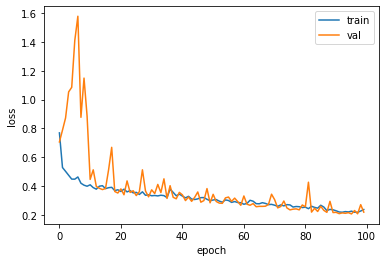

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

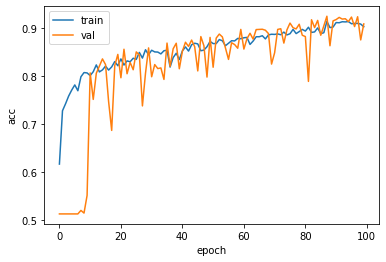

In [17]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [18]:
model.evaluate(x_valid_c, y_valid)

90/90 [==============================] - 3s 25ms/step - loss: 0.2179 - sparse_categorical_accuracy: 0.9083


[0.2179216593503952, 0.9083333611488342]

In [19]:
y_test_ndarray = y_test.to_numpy() 
scores = model.evaluate(x_test_c, y_test_ndarray)

print('Test Acc', scores[1])
print('Test Loss', scores[0])
print(model.metrics_names[1], scores[1]*100)

42/42 [==============================] - 2s 47ms/step - loss: 0.3475 - sparse_categorical_accuracy: 0.8500
Test Acc 0.8500000238418579
Test Loss 0.34746626019477844
sparse_categorical_accuracy 85.00000238418579


42/42 [==============================] - 0s 7ms/step


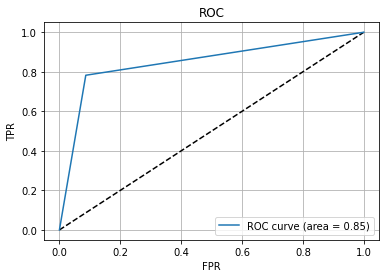

In [27]:
from sklearn.metrics import roc_curve, auc

predict_prob = model.predict(x_test_c)
predict_classes = np.argmax(predict_prob, axis = 1)

fprs, tprs, thredshold = roc_curve(y_test, predict_classes)
roc_auc = auc(fprs,tprs)

precisions, recalls, thredsholds = roc_curve(y_test, predict_classes)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fprs, tprs, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [21]:
from sklearn.metrics import classification_report
acc = accuracy_score(y_test, predict_classes)
print('accuracy_score : ',acc)

print(classification_report(y_test, predict_classes))

NameError: name 'accuracy_score' is not defined

In [ ]:
from pandas.core.frame import itertools
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, predict_classes)
ax = sns.heatmap(cf_matrix, annot=True, fmt='d',)
ax.set_xlabel("Predicted Diagnosis", fontsize = 14, labelpad = 20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize = 14, labelpad = 20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix", fontsize = 14, pad = 20)

In [ ]:
print(cf_matrix)